<a href="https://colab.research.google.com/github/alura-es-cursos/Inmersion-en-Datos-con-Python/blob/aula01/credito_banco_aleman_inmersion_Dia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INMERSIÓN DE DATOS CON PYTHON

#**PROBLEMA DE NEGOCIO**


---




La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

In [2]:
# prompt: importa los siguientes módulos con sus respectivos alias: pandas, matplotlib, seaborn, warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
# se utiliza para filtrar y silenciar las advertencias (warnings) en tu código.
# En Python, las advertencias son mensajes que se generan cuando se detecta algo que podría ser un error o una mala práctica, pero que aún permite que el programa se ejecute. Estas advertencias no detienen la ejecución del programa, pero a veces pueden ser molestas o llenar la salida de la consola con mensajes no deseados.

In [3]:
pd.set_option('display.max_columns',None)
# Pandas mostrará todas las columnas del DataFrame cuando se imprima en la consola o en cualquier otro formato de salida.

global df_banco, resultados
# se utiliza para indicar que las variables df_banco y resultados son globales.

In [4]:
df_banco = pd.read_csv('data/german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [5]:
df_banco.shape

(1000, 21)

In [6]:
df_banco.columns
# Muestra una lista con el nombre de todas las columnas

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [7]:
df_banco.info()
# muestra información resumida sobre el DataFrame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

##### Es necesario conocer los valores que son objetos o string para poder modificarlos y representarlos con numeros, para poder utilizar esa informacion en el aprendizaje automatico (machine learnin)

In [8]:
df_banco.account_check_status.value_counts().index
# imprime la lista de valores únicos de la columna "account_check_status" del DataFrame

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [9]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
# obtiene una lista de nombres de columnas que contienen tipos de datos de objeto (por ejemplo, cadenas de texto) en un DataFrame de Pandas

for columna in columnas:
  print(f'El nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  # imprime la lista de valores únicos en una columna específica del DataFrame
  
  print('\n')

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

##### Se realizará una función que eliminará los registros o filas duplicadas o con valores nulos y luego se cambiarán los valores únicos de las columnas que son <font color="yellow">string</font> por <font color="yellow">numeros</font> mediante diccionarios.

In [10]:
# dic = {'yes':1,'no':0}
# df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)
# df_banco['foreign_worker']

In [11]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [12]:
procesar_datos()

In [13]:
df_banco.sample(3)
# sample toma una cantidad de muestras aleatorias del dataframe

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
44,1,1,48,5,2,6143,5,1,4,2,1,4,4,58,2,3,2,2,1,0,1
156,0,1,9,5,7,1288,4,1,3,3,3,4,1,48,3,2,2,3,2,0,0
177,0,1,6,5,5,338,3,1,4,3,1,4,3,52,3,2,2,3,1,0,1


In [14]:
# Crear una lista con algunas columnas del dataframe que nos ayudaran a identificar o cattegorizar el credito
variables_discretas = ['personal_status_sex','age',
                       'duration_in_month','credit_amount','default']
df_banco[variables_discretas].tail(5)
# tail es para visualizar los ultimos datos del dataframe

,personal_status_sex,age,duration_in_month,credit_amount,default
995,2,31,12,1736,0
996,1,40,30,3857,0
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [15]:
# dic_sexo = {2:1,5:1,1:0,3:0,4:0}
# df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)

La siguiente funcion crea dos columnas nuevas 'sexo' y 'estado_civil' que se pueden obtener de la columna 'personal_status_sex'.

Tambien se crean otras 3 columnas 'rango_edad', 'rango_plazos_credito' y 'rango_valor_credito' categorizadas por rangos 

De esta manera el dataframe queda mejor representado

In [16]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}          # female = 1      male = 0
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}     # single = 1      demas = 0
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 100],
                                  labels = [1, 2, 3, 4, 5],
                                  right=False).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  
  # Eliminar las columnas que utilizamos para crea las otras colulmnas discretas
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [17]:
feature_engineering()
# sale error al ejecutar por segunda vez debido a que al ejecutarce elimina algunas columnas

In [18]:
df_banco.head(4)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8


In [19]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.104000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.135991,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,5.000000,6.000000,19.000000


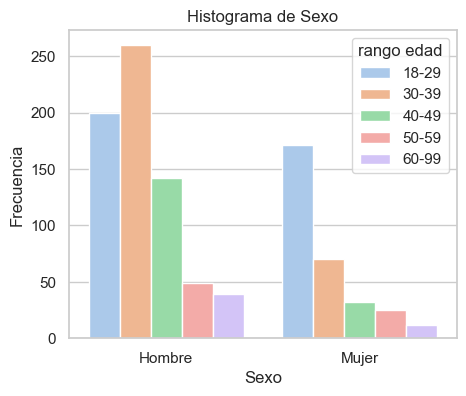

In [20]:
# Configurar el estilo de Seaborn (opcional)
sns.set_theme(style="whitegrid")

# Crear el histograma utilizando Seaborn
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df_banco, x='sexo', hue='rango_edad', palette='pastel')
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Configurar las etiquetas del eje x
plt.xticks(ticks=[0, 1], labels=['Hombre', 'Mujer'])

# Configurar las etiquetas en la leyenda del hue
ax.legend(title='rango edad', labels=['18-29', '30-39', '40-49', '50-59', '60-99'])

# Mostrar el histograma
plt.show()

In [21]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

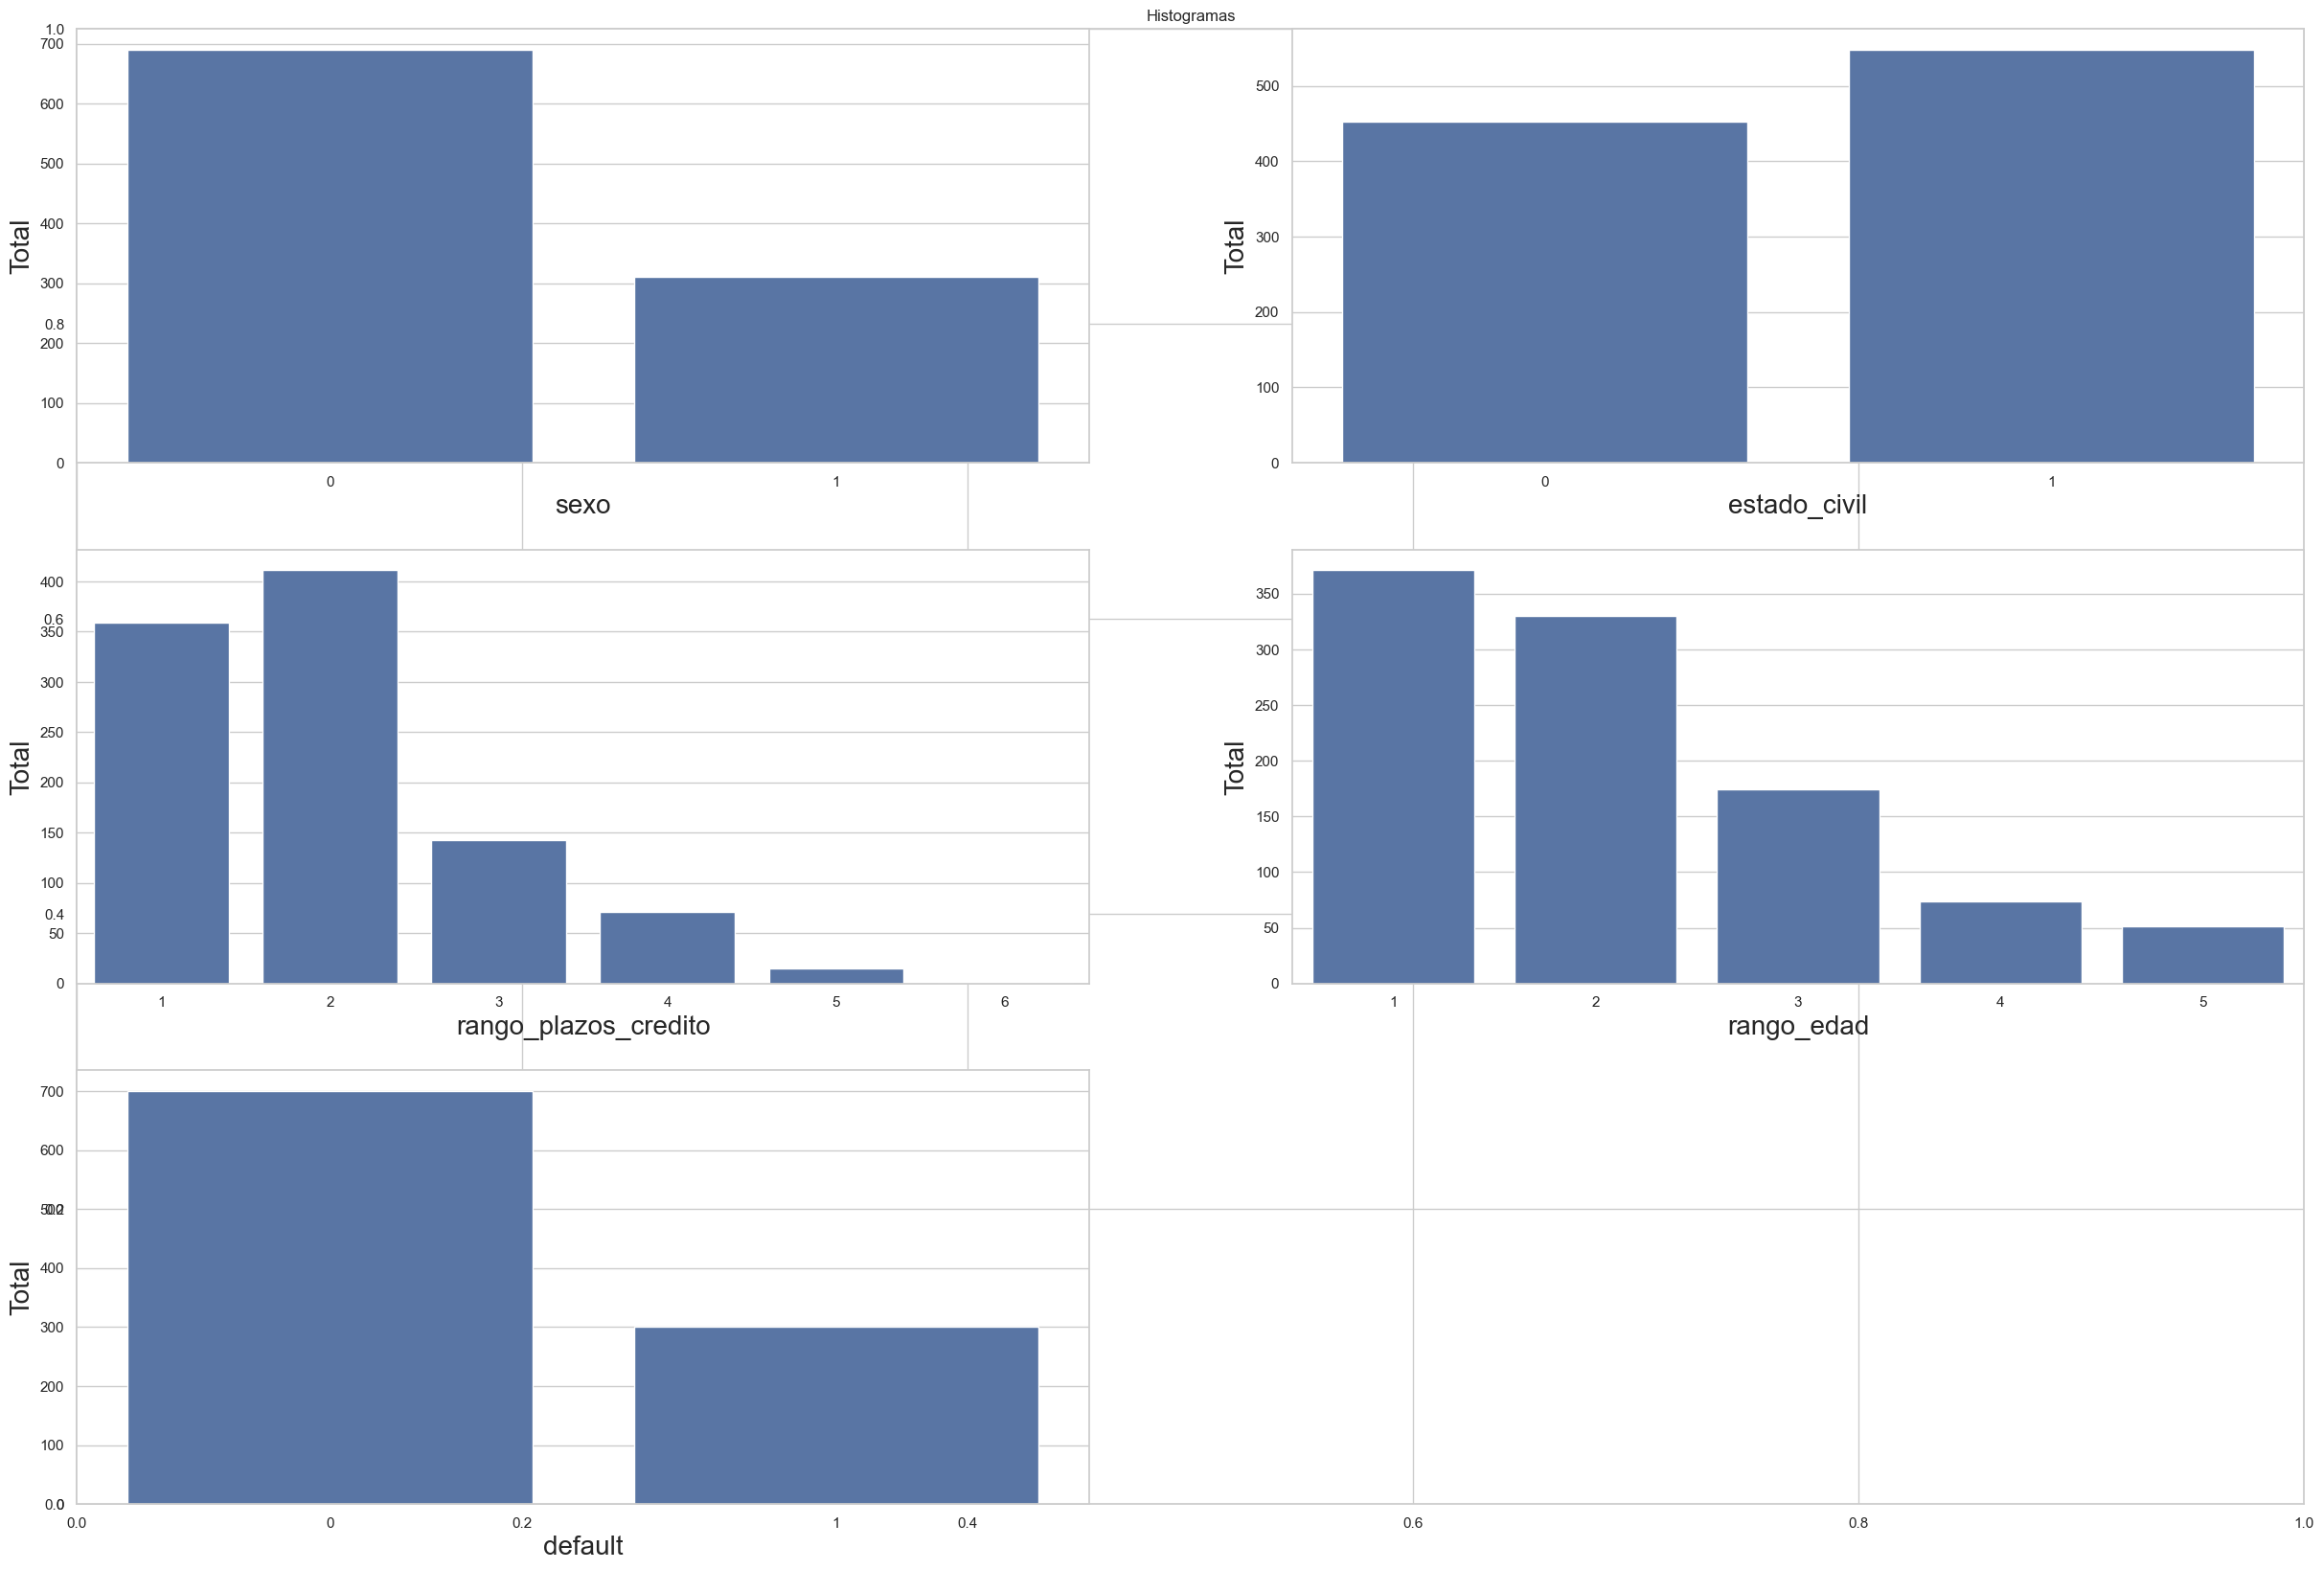

In [22]:
analisis_exploratorio()

## Desafíos

1. Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.
2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.
3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial.

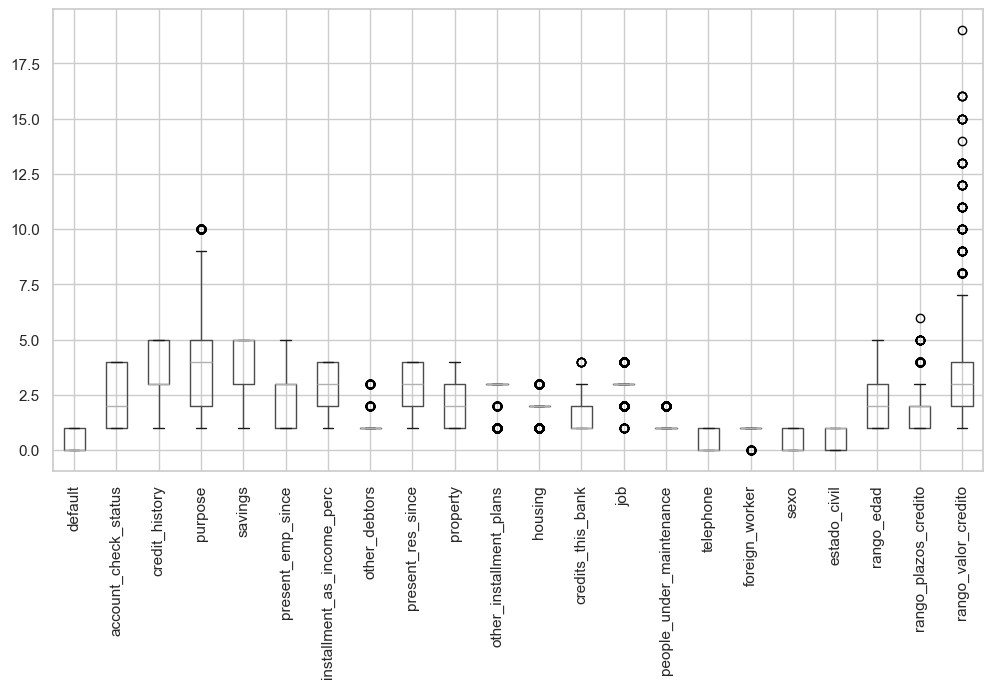

In [23]:
# Analisar todas las columnas para mirar cuales tienen datos atipicos
df_banco.boxplot(rot=90, figsize=(12, 6))
plt.show()

Visualiza el boxplot para la columna "rango_valor_credito" la cual se ve que tienen varios cantidades atipicas

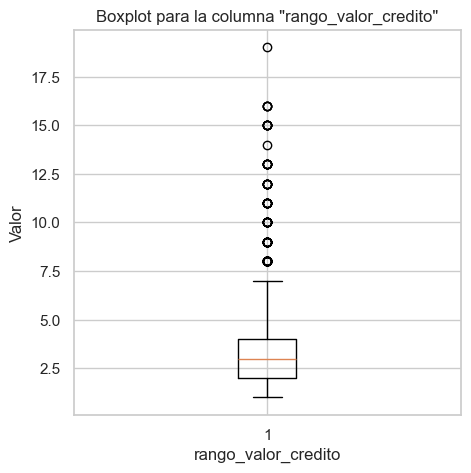

Límite inferior del bigote: 1.0
Límite superior del bigote: 7.0


In [42]:
# Establece el tamaño de la figura
plt.figure(figsize=(5, 5))  
# Crea el boxplot para la columna "rango_valor_credito"
boxplot_dict = plt.boxplot(df_banco['rango_valor_credito'])

# Personaliza el título y las etiquetas de los ejes usando el boxplot_dict
plt.title('Boxplot para la columna "rango_valor_credito"')
plt.xlabel('rango_valor_credito')
plt.ylabel('Valor')
plt.show()

# Obtiene los valores de los bigotes
limite_inferior = boxplot_dict['whiskers'][0].get_ydata()[1]
limite_superior = boxplot_dict['whiskers'][1].get_ydata()[1]

print("Límite inferior del bigote:", limite_inferior)
print("Límite superior del bigote:", limite_superior) 

In [45]:
# visualizar los valores superirores atipicos 
df_banco[df_banco['rango_valor_credito'] > limite_superior]

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
5,0,4,3,8,1,3,2,1,4,4,3,3,1,2,2,1,1,0,1,2,3,10
17,0,1,1,10,1,4,2,1,3,3,1,2,3,3,1,0,1,0,1,1,3,9
18,1,2,3,2,5,1,4,1,2,4,3,3,1,4,1,1,1,1,0,3,2,13
48,0,4,5,1,5,3,1,1,4,2,3,2,2,2,1,0,1,0,1,2,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,4,3,5,1,2,2,1,4,2,3,1,1,3,1,1,1,0,0,1,4,8
971,0,4,3,1,5,3,1,1,4,2,3,2,1,2,2,0,1,0,1,3,2,8
973,1,1,3,10,5,1,4,2,4,4,3,1,1,3,1,0,1,0,1,2,5,8
980,1,2,5,4,5,2,2,1,2,2,3,2,1,3,1,0,1,0,1,3,3,9


In [44]:
# Crear una serie con los datos que se desean modificar o eliminar
rango_valor_credito = df_banco['rango_valor_credito']

In [47]:
# Crear el criterio de seleccion que separe los valores buenos de los valores errados o exagerados
seleccion = ((rango_valor_credito >= limite_inferior) & (rango_valor_credito <= limite_superior))

In [49]:
df_banco_new = df_banco[seleccion]
df_banco_new.head(10)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5
6,0,4,3,4,3,1,3,1,4,2,3,2,1,3,1,0,1,0,1,4,2,3
7,0,2,3,2,5,3,2,1,2,3,3,1,1,4,1,1,1,0,1,2,3,7
8,0,4,3,5,2,2,2,1,4,1,3,2,1,2,1,0,1,0,0,5,1,4
9,1,2,5,1,5,5,4,1,2,3,3,2,2,4,1,0,1,0,0,1,3,6
10,1,2,3,1,5,4,3,1,1,3,3,1,1,3,1,0,1,1,0,1,1,2
11,1,1,3,10,5,4,3,1,4,2,3,1,1,3,1,0,1,1,0,1,4,5


Volver a realizar el boxplot de la columna 'rango_valor_credito' de nueva tabla y corrobar que ya no presenta valores atipicos

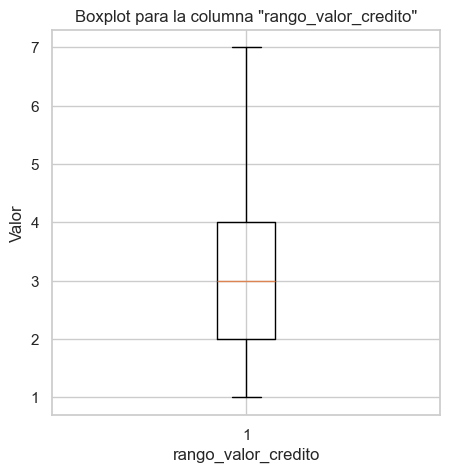

In [53]:
# Establece el tamaño de la figura
plt.figure(figsize=(5, 5))  
# Crea el boxplot para la columna "rango_valor_credito"
boxplot_dict = plt.boxplot(df_banco_new['rango_valor_credito'])

# Personaliza el título y las etiquetas de los ejes usando el boxplot_dict
plt.title('Boxplot para la columna "rango_valor_credito"')
plt.xlabel('rango_valor_credito')
plt.ylabel('Valor')
plt.show()